In [1]:
import sys
import argparse
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import os
import time
import json
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
from keras.models import model_from_json
from keras.optimizers import SGD, RMSprop, Adagrad

Using TensorFlow backend.


In [2]:
sgd = SGD(lr=1e-7, decay=0.5, momentum=1, nesterov=True)
rms = RMSprop(lr=1e-7, rho=0.9, epsilon=1e-08, decay=0.0)
ada = Adagrad(lr=1e-7, epsilon=1e-08, decay=0.0)
optimizer = sgd

target_size = (229, 229) 

In [3]:
def generate_timestamp():
    timestring = time.strftime("%Y_%m_%d-%H_%M_%S")
    print ("Time stamp generated: "+timestring)
    return timestring

timestr = generate_timestamp()

Time stamp generated: 2017_10_01-12_26_59


In [4]:
def is_valid_file(parser, arg):
    if not os.path.isfile(arg):
        parser.error("The file %s does not exist ..." % arg)
    else:
        return arg

In [5]:
def is_valid_dir(parser, arg):
    if not os.path.isdir(arg):
        parser.error("The folder %s does not exist ..." % arg)
    else:
        return arg

In [6]:
def compile_model(model):
    model.compile(optimizer=optimizer, 
                loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
def load_prediction_model(args):
    try:
        print (args.config_file[0]) 
        with open(args.config_file[0]) as json_file:
              model_json = json_file.read()
        model = model_from_json(model_json)
    except:
          print ("Please specify a model configuration file ...")
          sys.exit(1)
    try:
          model.load_weights(args.weights_file[0])
          print ("Loaded model weights from: " + str(args.weights_file[0]))
    except:
          print ("Error loading model weights ...")
          sys.exit(1)
    try:
        print (args.labels_file[0])
        with open(args.labels_file[0]) as json_file:
            labels = json.load(json_file)
        print ("Loaded labels from: " + str(args.labels_file[0]))
    except:
        print ("No labels loaded ...")
        sys.exit(1)
    return model, labels

In [8]:
def plot_preds(image, preds, labels):
  output_loc = args.output_dir[0]
  output_file_preds = os.path.join(output_loc+"//preds_out_"+timestr+".png")
  fig = plt.figure()
  plt.axis('on')
  labels = labels
  plt.barh([0, 1], preds, alpha=0.5)
  plt.yticks([0, 1], labels)
  plt.xlabel('Probability')
  plt.xlim(0,1.01)
  plt.tight_layout()
  fig.savefig(output_file_preds, dpi=fig.dpi)

In [9]:
def predict(model, img, target_size):
  print ("Running prediction model on the image file ...")
  if img.size != target_size:
    img = img.resize(target_size)

  _x_ = image.img_to_array(img)
  _x_ = np.expand_dims(_x_, axis=0)
  _x_ = preprocess_input(_x_)
  preds = model.predict(_x_)
  probabilities = model.predict(_x_, batch_size=1).flatten()
  prediction = labels[np.argmax(probabilities)]
  return preds[0], prediction

In [10]:
import types
args=types.SimpleNamespace()
args.config_file = ['/home/rahulremanan/notebooks/model/trained_cats_dogs.config']
args.weights_file = ['/home/rahulremanan/notebooks/model/trained_cats_dogs_epochs30_weights.model']
args.labels_file = ['/home/rahulremanan/notebooks/model/trained_labels.json']
args.output_dir = ['/home/rahulremanan/notebooks/']
args.image = ['/home/rahulremanan/notebooks/cat.jpg']
args.image_url = ['https://goo.gl/571Pvn']

In [11]:
model, labels = load_prediction_model(args)

/home/rahulremanan/notebooks/model/trained_cats_dogs.config
Loaded model weights from: /home/rahulremanan/notebooks/model/trained_cats_dogs_epochs30_weights.model
/home/rahulremanan/notebooks/model/trained_labels.json
Loaded labels from: /home/rahulremanan/notebooks/model/trained_labels.json


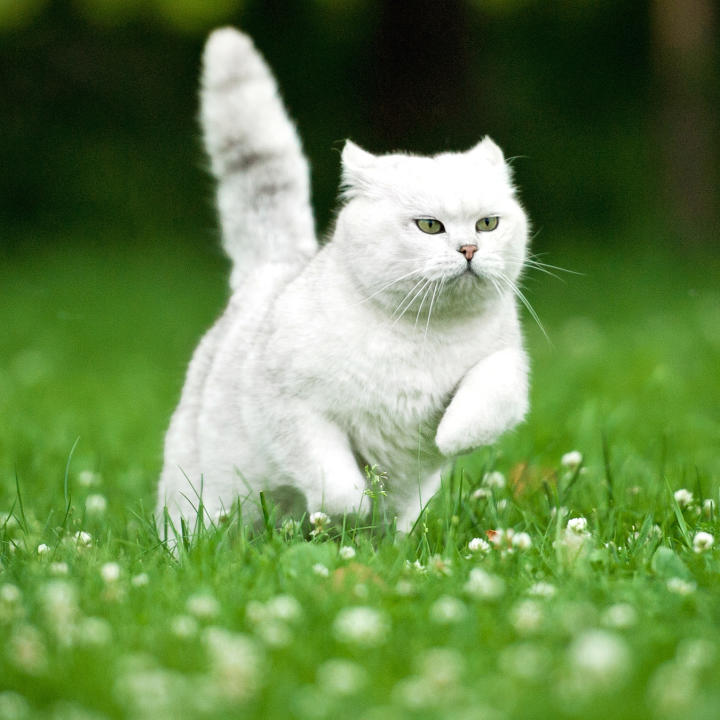

In [12]:
from IPython.display import Image as PyImage
from IPython.core.display import HTML 
PyImage(args.image[0])

In [13]:
if args.image is not None:
    img = Image.open(args.image[0])
    preds = predict(model, img, target_size)
    print (preds[1] + "\t" + "\t".join(map(lambda x: "%.2f" % x, preds[0])))
    print (str(preds[1]))
    plot_preds(img, preds[0], labels)

Running prediction model on the image file ...
cats	0.95	0.05
cats


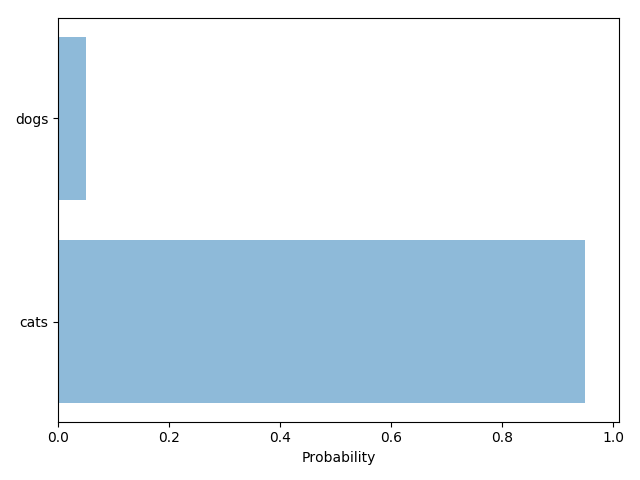

In [14]:
image_path_pred1 = os.path.join('/home/rahulremanan/notebooks/preds_out_'+timestr+'.png')
PyImage(image_path_pred1)

In [15]:
PyImage(url = args.image_url[0])

In [16]:
timestr = generate_timestamp()

Time stamp generated: 2017_10_01-12_27_20


In [17]:
if args.image_url is not None:
    response = requests.get(args.image_url[0])
    img = Image.open(BytesIO(response.content))
    preds = predict(model, img, target_size)
    print (preds[1] + "\t" + "\t".join(map(lambda x: "%.2f" % x, preds[0])))
    print (str(preds[1]))
    plot_preds(img, preds[0], labels)

Running prediction model on the image file ...
cats	0.63	0.37
cats


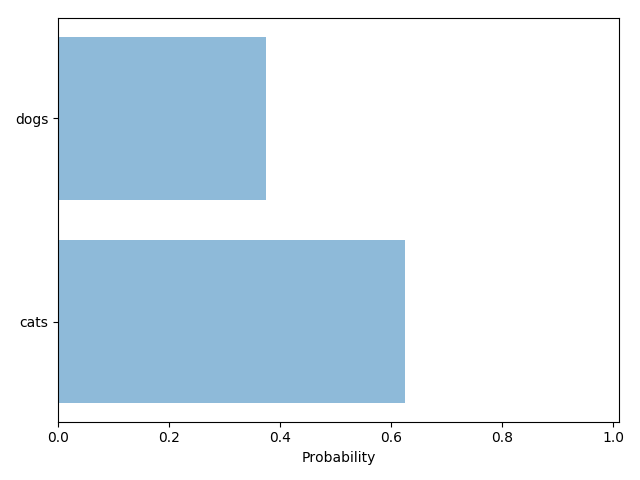

In [18]:
image_path_pred2 = os.path.join('/home/rahulremanan/notebooks/preds_out_'+timestr+'.png')
PyImage(image_path_pred2)